<a href="https://colab.research.google.com/github/eshitalakhani/GLOBAL-TERRORISM-/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 <b> LOADING DATA SET

In [12]:
#ISO/IEC 8859-1 encodes what it refers to as "Latin alphabet no. 1"

gtd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Global Terrorism Data.csv', encoding ='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


For given data set, each column is demanding very high memory, pandas tries to determine what dtype to set by analyzing the data in each column.


In [ ]:
#information about data frame
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [13]:
pd.set_option('display.max_columns',None)
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [14]:
gtd.country

0          58
1         130
2         160
3          78
4         101
         ... 
181686    182
181687    200
181688    160
181689     92
181690    160
Name: country, Length: 181691, dtype: int64

## 2 <b> **Understadning, Wrangling and Cleaning Data** <b> ##

In [15]:
gtd.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [16]:
# the data set have more than 60% of NAN values so lets drop the unnessary columns by using for loop 
#column = []
#for i in gtd.columns:
 # if gtd[i].isnull().sum()> 15000:
 #   column.append(i)
#gtd.drop(column,inplace=True,axis=1)

In [17]:
 
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Countrys_','region_txt':'Region',
                     'provstate':'State','city':'city','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                     'nwound':'wounds'},inplace=True)

In [18]:
gtd.head(3)

,eventid,Year,Month,day,approxdate,extended,resolution,country,Countrys_,region,Region,State,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Targettype,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,kill,nkillus,nkillter,wounds,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [19]:
# created a work bench that we need only perform analysis on this data
gtd = gtd[['Year','Month','day','Countrys_','State','Region','city','latitude','longitude',"Attacktype",'kill',
               'target1','Group','Targettype','Weapon','wounds','summary']]
gtd.head()

,Year,Month,day,Countrys_,State,Region,city,latitude,longitude,Attacktype,kill,target1,Group,Targettype,Weapon,wounds,summary
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,0.0,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,0.0,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,Employee,Unknown,Journalists & Media,Unknown,0.0,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [20]:
gtd.columns

Index(['Year', 'Month', 'day', 'Countrys_', 'State', 'Region', 'city',
       'latitude', 'longitude', 'Attacktype', 'kill', 'target1', 'Group',
       'Targettype', 'Weapon', 'wounds', 'summary'],
      dtype='object')

In [21]:
'summary','Wounds'

('summary', 'Wounds')

In [22]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Countrys_   181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   city        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  target1     181055 non-null  object 
 12  Group       181691 non-null  object 
 13  Targettype  181691 non-null  object 
 14  Weapon      181691 non-null  object 
 15  wounds      165380 non-null  float64
 16  summary     115562 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [23]:
gtd.describe()

,Year,Month,day,latitude,longitude,kill,wounds
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# 3 <b> EXPLORING & VISUALIZING DATA <b> #

TOP 10 COUNTRIES WHO ARE MOST AFFECTED BY THE TERRORIST

In [26]:

#Which are the top 10 Countries who are most affected by the terrorist attacks
print('Country with Highest Terrorist Attacks:\n',
     gtd ['Countrys_'].value_counts().head (10))

Country with Highest Terrorist Attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Countrys_, dtype: int64


## CITY WISE ATTACKS 

In [ ]:
# city wise attacks
city=gtd["city"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

 * OBSERVATION 
 HIGHEST ATTACKS IN BAGHDAD 



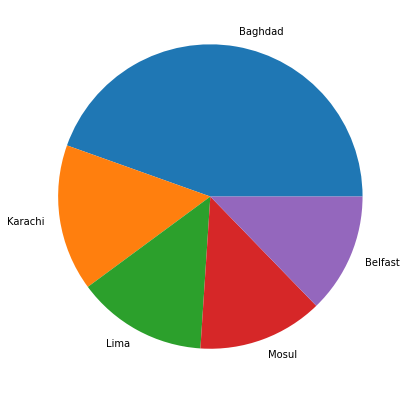

In [ ]:
#Created PieChart by using matplotlib.pyplot as plt for City Wise Attacks
from matplotlib import pyplot as plt
import numpy as np

# creating dataset
city=['Baghdad','Karachi','Lima','Mosul','Belfast']
data=[7589,2652,2359,2265,2171]
fig = plt.figure(figsize=(15,7))
plt.pie(data,labels = city)
plt.show()

## YEAR WISE ATTACKS

In [ ]:
# YEAR WISE ATTACKS
attacks = gtd["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head(10)


,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


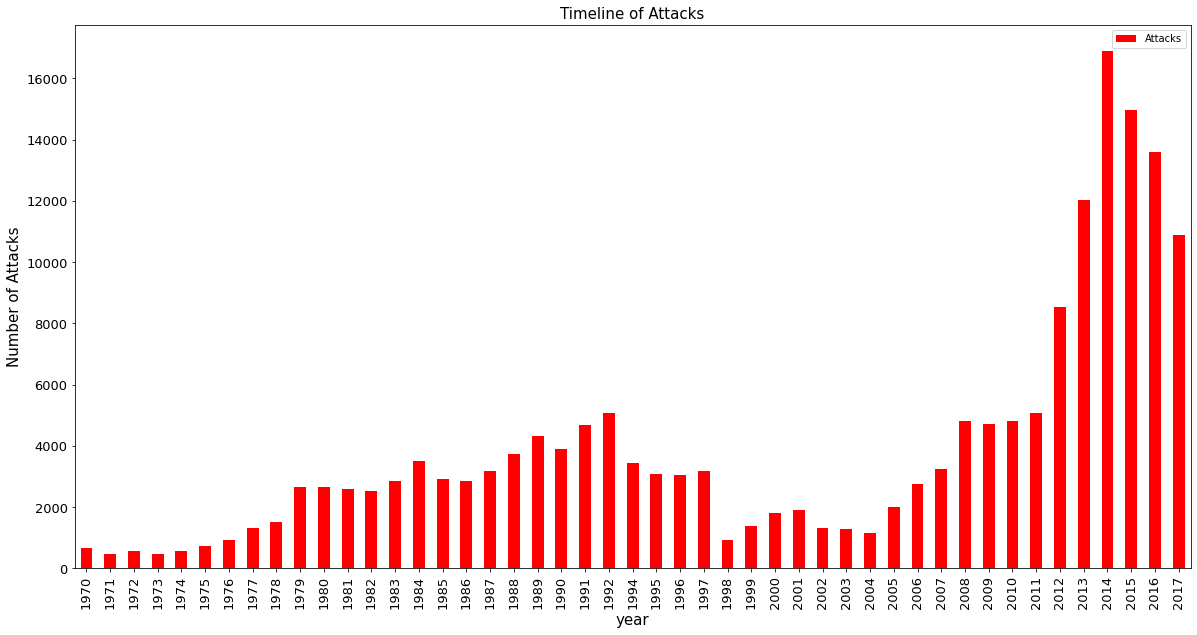

In [ ]:

attacks.plot(kind="bar",color="red",figsize=(20,10),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("year",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

***OBSERVATION*** from above  chart

 (i). Most number of attacks(16903) in 2014

  (ii). Least number of attacks(471) in 1971

## **Terrorist Group wise Attacks - Top 10**

In [ ]:
# Terrorist Group wise Attacks - Top 10
grp=gtd["Group"].value_counts()[1:10]
pd.DataFrame(grp)

,Group
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


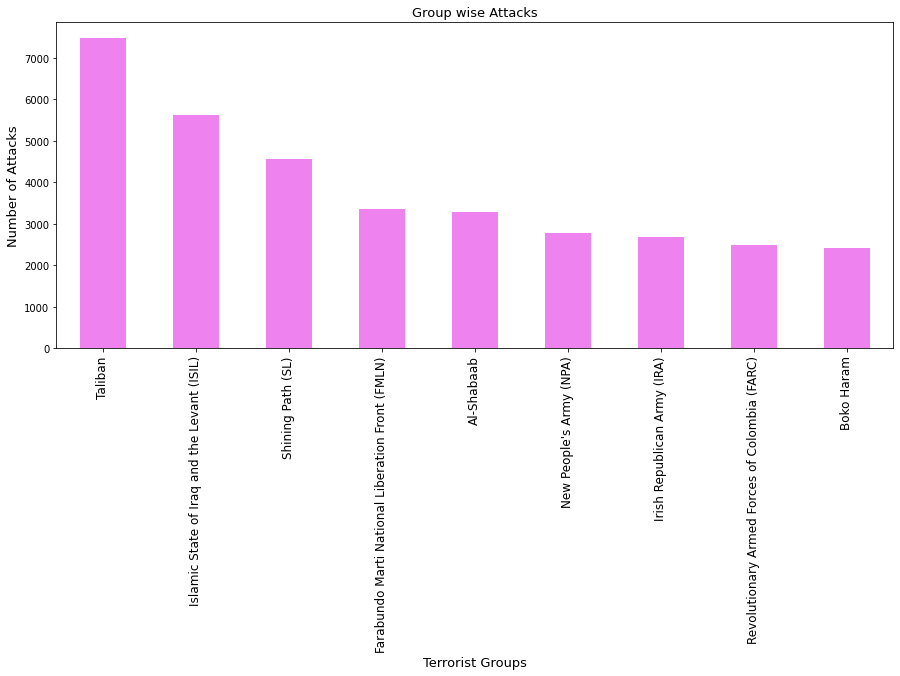

In [ ]:
grp.plot(kind="bar",color="violet",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

## ATTACKS IN REGIONS

---

*   Killed vs Region
*   wounded vs region
*   Attacks Vs killed







In [ ]:
#region value_counts() for infomation

pd.DataFrame(gtd.Region.value_counts())

,Region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


Killed vs Region

---




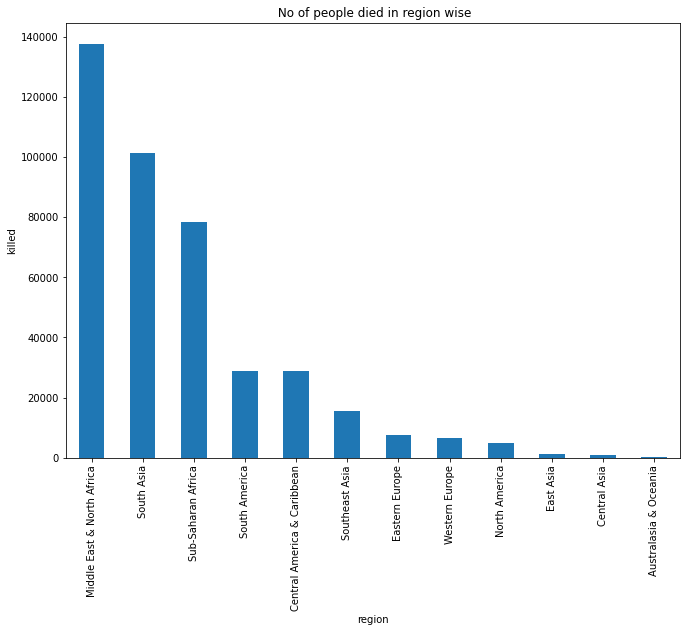

In [ ]:
# created bar plot by using matplotlib.pyplot as plt for region wise killed
plt.figure(figsize=(11,8))
gtd.groupby(['Region'])['kill'].sum().sort_values(ascending = False).plot(kind='bar') 


plt.title(" No of people died in region wise")
# Set x and y-labels 
plt.ylabel('killed')
plt.xlabel('region')
plt.show()

 On above Bar chart we can see the most no of kills in region was middle east & north africa

wounded vs region

---










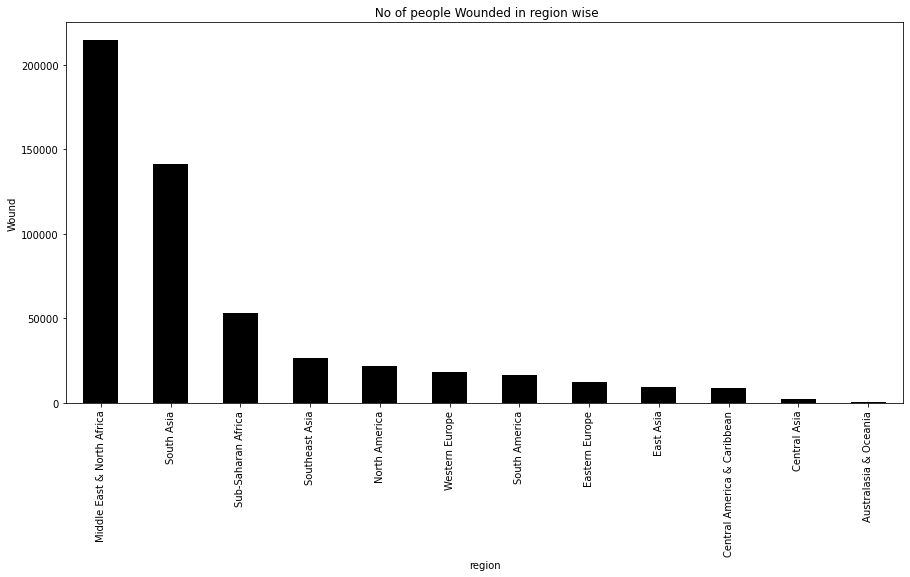

In [ ]:
# created bar plot by using matplotlib.pyplot as plt for region wise wonded
plt.figure(figsize=(15,7))
gtd.groupby(['Region'])['wounds'].sum().sort_values(ascending = False).plot(kind='bar',colormap = 'copper') 
plt.title(" No of people Wounded in region wise")
# Set x and y-labels 
plt.ylabel('Wound')
plt.xlabel('region')
plt.show()

Attacks Vs killed

---



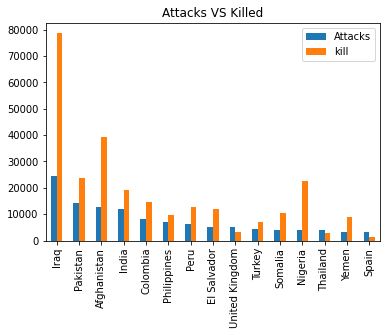

In [ ]:
# Create the figure object 
# ceating a variable that stores country values
terroist_attacks =gtd['Countrys_'].value_counts()[:15].to_frame()
terroist_attacks.columns=['Attacks']

#group by operation for countrys and kills 
count_kill = gtd.groupby('Countrys_')['kill'].sum().to_frame()

#merging  count_kill & terroist_attacks by using merge to get bar chart
terroist_attacks.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar()

# given title
plt.title("Attacks VS Killed")
fig.set_size_inches(10,20)
plt.show()



In [ ]:
attacks = gtd ["day"].value_counts()
attacks.head(10)

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
Name: day, dtype: int64